In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [5]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)

In [6]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [7]:
y_pred = clf.predict(X_test)

In [8]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))


 Accuracy: 0.951048951048951

 Classification Report:
               precision    recall  f1-score   support

   malignant       0.93      0.94      0.94        54
      benign       0.97      0.96      0.96        89

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



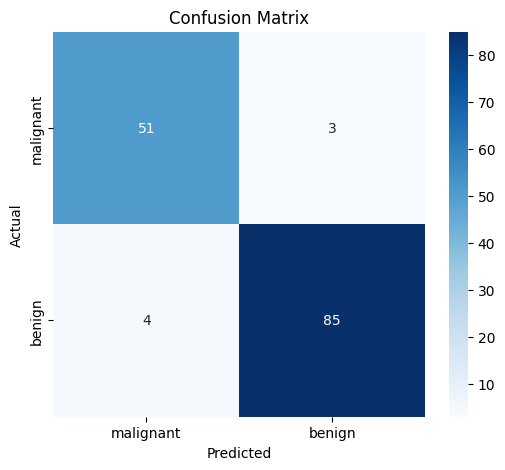

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

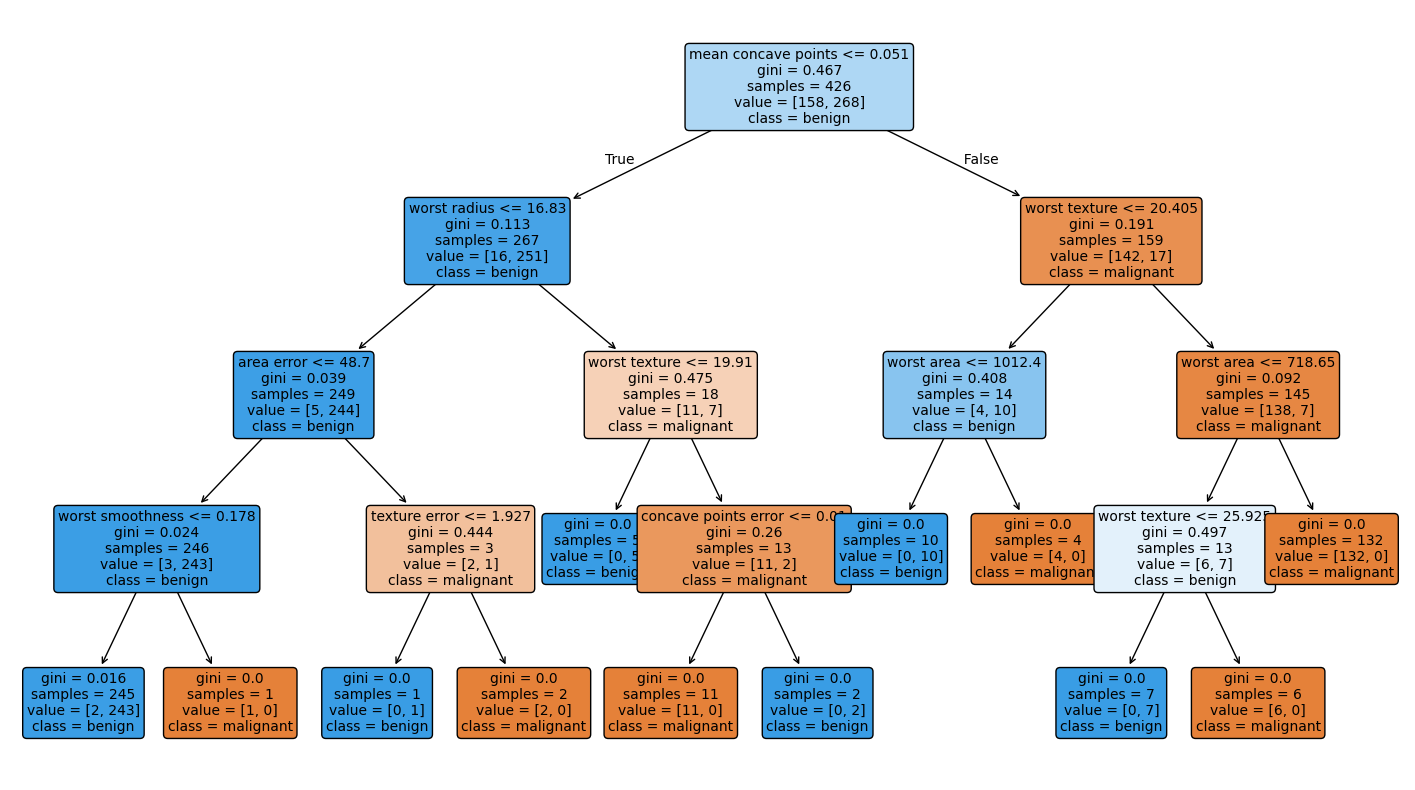

In [10]:
plt.figure(figsize=(18,10))
plot_tree(
    clf,
    filled=True,
    feature_names=data.feature_names,
    class_names=data.target_names,
    rounded=True,
    fontsize=10
)
plt.show()

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [19]:
data=load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [20]:
for col in data.feature_names:
    df[col] = pd.cut(df[col], bins=5, labels=False)

In [21]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

In [22]:
def oneR(train_df, target_col):
    best_feature = None
    best_accuracy = 0
    best_rule = {}

    for feature in train_df.columns:
        if feature == target_col:
            continue

       
        rule = {}
        for val in train_df[feature].unique():
            most_common_class = (
                train_df[train_df[feature] == val][target_col].mode()[0]
            )
            rule[val] = most_common_class

      
        preds = train_df[feature].map(rule)
        acc = accuracy_score(train_df[target_col], preds)

        if acc > best_accuracy:
            best_accuracy = acc
            best_feature = feature
            best_rule = rule

    return best_feature, best_rule, best_accuracy

In [23]:
best_feature, best_rule, best_acc = oneR(train_df, 'target')

In [24]:
print(f" Best Feature: {best_feature}")
print(f" Rule: {best_rule}")
print(f" Training Accuracy: {best_acc:.2f}")

 Best Feature: flavanoids
 Rule: {np.int64(0): np.int64(2), np.int64(1): np.int64(1), np.int64(2): np.int64(0), np.int64(3): np.int64(0), np.int64(4): np.int64(1)}
 Training Accuracy: 0.79


In [25]:
test_preds = test_df[best_feature].map(best_rule)

In [26]:
test_preds = test_preds.fillna(train_df['target'].mode()[0])

In [27]:
print("\n", accuracy_score(test_df['target'], test_preds))
print("\n Classification Report\n", classification_report(test_df['target'], test_preds))


 0.7962962962962963

 Classification Report
               precision    recall  f1-score   support

           0       0.73      1.00      0.84        19
           1       0.86      0.57      0.69        21
           2       0.86      0.86      0.86        14

    accuracy                           0.80        54
   macro avg       0.82      0.81      0.80        54
weighted avg       0.81      0.80      0.79        54

